# Assignment - Decision Tree Classification - McCartney

In this assignment, we will focus on healthcare. This data set is made available by the Center for Clinical and Translational Research, Virginia Commonwealth University. It contains data about 10 years of clinical care at 130 US Hospitals. Each row represents a single patient. The columns include the characteristics of deidentified diabetes patients. This is a binary classification task: predict whether a diabetes patient is readmitted to the hospital within 30 days of their discharge (1=Yes, 0=No). This is an important performance metric for hospitals as they try to minimize these types of readmissions.

## Description of Variables

The description of variables are provided in "Healthcare - Data Dictionary.docx"

## Goal

Use the **healthcare.csv** data set and build a model to predict **readmitted**. Build (at least) **two decision tree** models.

## Submission:

Please save and submit this Jupyter notebook file. The correctness of the code matters for your grade. **Readability and organization of your code is also important.** You may lose points for submitting unreadable/undecipherable code. Therefore, use markdown cells to create sections, and use comments where necessary.



# Read and Prepare the Data
## Also, perform feature engineering: create one new variable from existing ones

In [1]:
# Common imports
import numpy as np
import pandas as pd

np.random.seed(31484443)

In [2]:
# Import the data set
#We will predict the "readmitted" value in the data set:

healthcare = pd.read_csv("healthcare.csv")
healthcare.head()

,race,gender,age,admission_type,discharge_disposition,admission_source,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,...,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,insulin,change,diabetesMed,readmitted
0,Other,Female,70-80,2,3,1,14,NaN,InternalMedicine,32,...,486,404,428,9,None,None,No,No,No,1
1,Caucasian,Female,80-90,1,3,5,4,MC,NaN,44,...,38,438,599,9,None,None,Steady,Ch,Yes,0
2,AfricanAmerican,Male,50-60,5,1,1,6,HM,NaN,29,...,296,585,428,9,None,None,Up,Ch,Yes,1
3,Caucasian,Female,50-60,1,1,6,3,HM,InternalMedicine,47,...,250.02,401,493,4,None,>8,No,Ch,Yes,0
4,AfricanAmerican,Female,40-50,3,1,1,4,UN,Hematology,92,...,486,287,595,7,None,>7,No,No,No,0


In [3]:
healthcare.shape

(8666, 25)

In [4]:
healthcare.isna().sum()

race                      174
gender                      0
age                         0
admission_type              0
discharge_disposition       0
admission_source            0
time_in_hospital            0
payer_code               3524
medical_specialty        4349
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      3
diag_2                     20
diag_3                     98
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
insulin                     0
change                      0
diabetesMed                 0
readmitted                  0
dtype: int64

## Split Data (train/test)

In [5]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(healthcare, test_size=0.3)

In [6]:
train_set.shape

(6066, 25)

In [7]:
train_set.isna().sum()

race                      126
gender                      0
age                         0
admission_type              0
discharge_disposition       0
admission_source            0
time_in_hospital            0
payer_code               2476
medical_specialty        3048
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      2
diag_2                     14
diag_3                     63
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
insulin                     0
change                      0
diabetesMed                 0
readmitted                  0
dtype: int64

In [8]:
test_set.shape

(2600, 25)

In [9]:
test_set.isna().sum()

race                       48
gender                      0
age                         0
admission_type              0
discharge_disposition       0
admission_source            0
time_in_hospital            0
payer_code               1048
medical_specialty        1301
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      1
diag_2                      6
diag_3                     35
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
insulin                     0
change                      0
diabetesMed                 0
readmitted                  0
dtype: int64

## Data Prep

In [10]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import FunctionTransformer

In [11]:
# We can't use the following columns in this tutorial, because they are not for binary classification tasks

train = train_set.drop([], axis=1)
test = test_set.drop([], axis=1)

In [12]:
# Separate the target variable and input variables

train_y = train[['readmitted']]
test_y = test[['readmitted']]

train_inputs = train.drop(['readmitted'], axis=1)
test_inputs = test.drop(['readmitted'], axis=1)

## Feature Engineering

Create new binary column: if a patient was in hospital 3 days or less, its a 1, otherwise, 0

In [ ]:
def new_col(df):
    #Create a copy so that we don't overwrite the existing dataframe
    df1 = df.copy()
    
    df1['time_in_hospital_3daysorless'] = np.where(df1['time_in_hospital'] < 4, 1, 0)
    
    return df1[['time_in_hospital_3daysorless']]
    # You can use this to check whether the calculation is made correctly:
    #return df1

In [ ]:
#Let's test the new function:

# Send the train set to the function we created
new_col(train_set)

In [13]:
# Identify the columns

train_inputs.dtypes

race                     object
gender                   object
age                      object
admission_type            int64
discharge_disposition     int64
admission_source          int64
time_in_hospital          int64
payer_code               object
medical_specialty        object
num_lab_procedures        int64
num_procedures            int64
num_medications           int64
number_outpatient         int64
number_emergency          int64
number_inpatient          int64
diag_1                   object
diag_2                   object
diag_3                   object
number_diagnoses          int64
max_glu_serum            object
A1Cresult                object
insulin                  object
change                   object
diabetesMed              object
dtype: object

In [14]:
# Identify the numerical columns
numeric_columns = train_inputs.select_dtypes(include=[np.number]).columns.to_list()

# Identify the categorical columns
categorical_columns = train_inputs.select_dtypes('object').columns.to_list()

In [15]:
# binary_columns

In [16]:
numeric_columns

['admission_type',
 'discharge_disposition',
 'admission_source',
 'time_in_hospital',
 'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_outpatient',
 'number_emergency',
 'number_inpatient',
 'number_diagnoses']

In [17]:
categorical_columns

['race',
 'gender',
 'age',
 'payer_code',
 'medical_specialty',
 'diag_1',
 'diag_2',
 'diag_3',
 'max_glu_serum',
 'A1Cresult',
 'insulin',
 'change',
 'diabetesMed']

In [ ]:
feat_eng_columns = ['time_in_hospital']

## Pipeline

In [18]:
numeric_transformer = Pipeline(steps=[
                ('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler())])

In [19]:
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='unknown')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [20]:
binary_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent'))])

In [ ]:
my_new_column = Pipeline(steps=[('my_new_column', FunctionTransformer(new_col))])

In [21]:
preprocessor = ColumnTransformer([
        ('num', numeric_transformer, numeric_columns),
        ('cat', categorical_transformer, categorical_columns),
        # ('binary', binary_transformer, binary_columns),
        ('trans', my_new_column, feat_eng_columns)],
        remainder='passthrough')

#passtrough is an optional step. You don't have to use it.

## Transform: fit_transform() and TRAIN

In [22]:
#Fit and transform the train data
train_x = preprocessor.fit_transform(train_inputs)

train_x

<6066x1285 sparse matrix of type '<class 'numpy.float64'>'
	with 145584 stored elements in Compressed Sparse Row format>

In [ ]:
train_x.shape

## Transform: transform() for TEST

In [23]:
# Transform the test data
test_x = preprocessor.transform(test_inputs)

test_x

<2600x1285 sparse matrix of type '<class 'numpy.float64'>'
	with 62244 stored elements in Compressed Sparse Row format>

In [24]:
test_x.shape

(2600, 1285)

# Baseline:

In [25]:
train_y.value_counts()/len(train_y)

readmitted
0             0.529179
1             0.470821
dtype: float64

# Decision Tree Model 1: Multiclass Classification

In [26]:
from sklearn.tree import DecisionTreeClassifier 

tree_clf = DecisionTreeClassifier(min_samples_leaf=10)

tree_clf.fit(train_x, train_y)

DecisionTreeClassifier(min_samples_leaf=10)

In [27]:
from sklearn.metrics import accuracy_score

#Train accuracy:
train_y_pred = tree_clf.predict(train_x)

print(accuracy_score(train_y, train_y_pred))

0.751730959446093


In [28]:
#Test accuracy:
test_y_pred = tree_clf.predict(test_x)

print(accuracy_score(test_y, test_y_pred))

0.5565384615384615


In [29]:
from sklearn.metrics import confusion_matrix

#Test confusion matrix
confusion_matrix(test_y, test_y_pred)

array([[857, 551],
       [602, 590]], dtype=int64)

In [30]:
from sklearn.metrics import classification_report

print(classification_report(test_y, test_y_pred))

              precision    recall  f1-score   support

           0       0.59      0.61      0.60      1408
           1       0.52      0.49      0.51      1192

    accuracy                           0.56      2600
   macro avg       0.55      0.55      0.55      2600
weighted avg       0.56      0.56      0.56      2600



TypeError: can only concatenate str (not "numpy.int64") to str

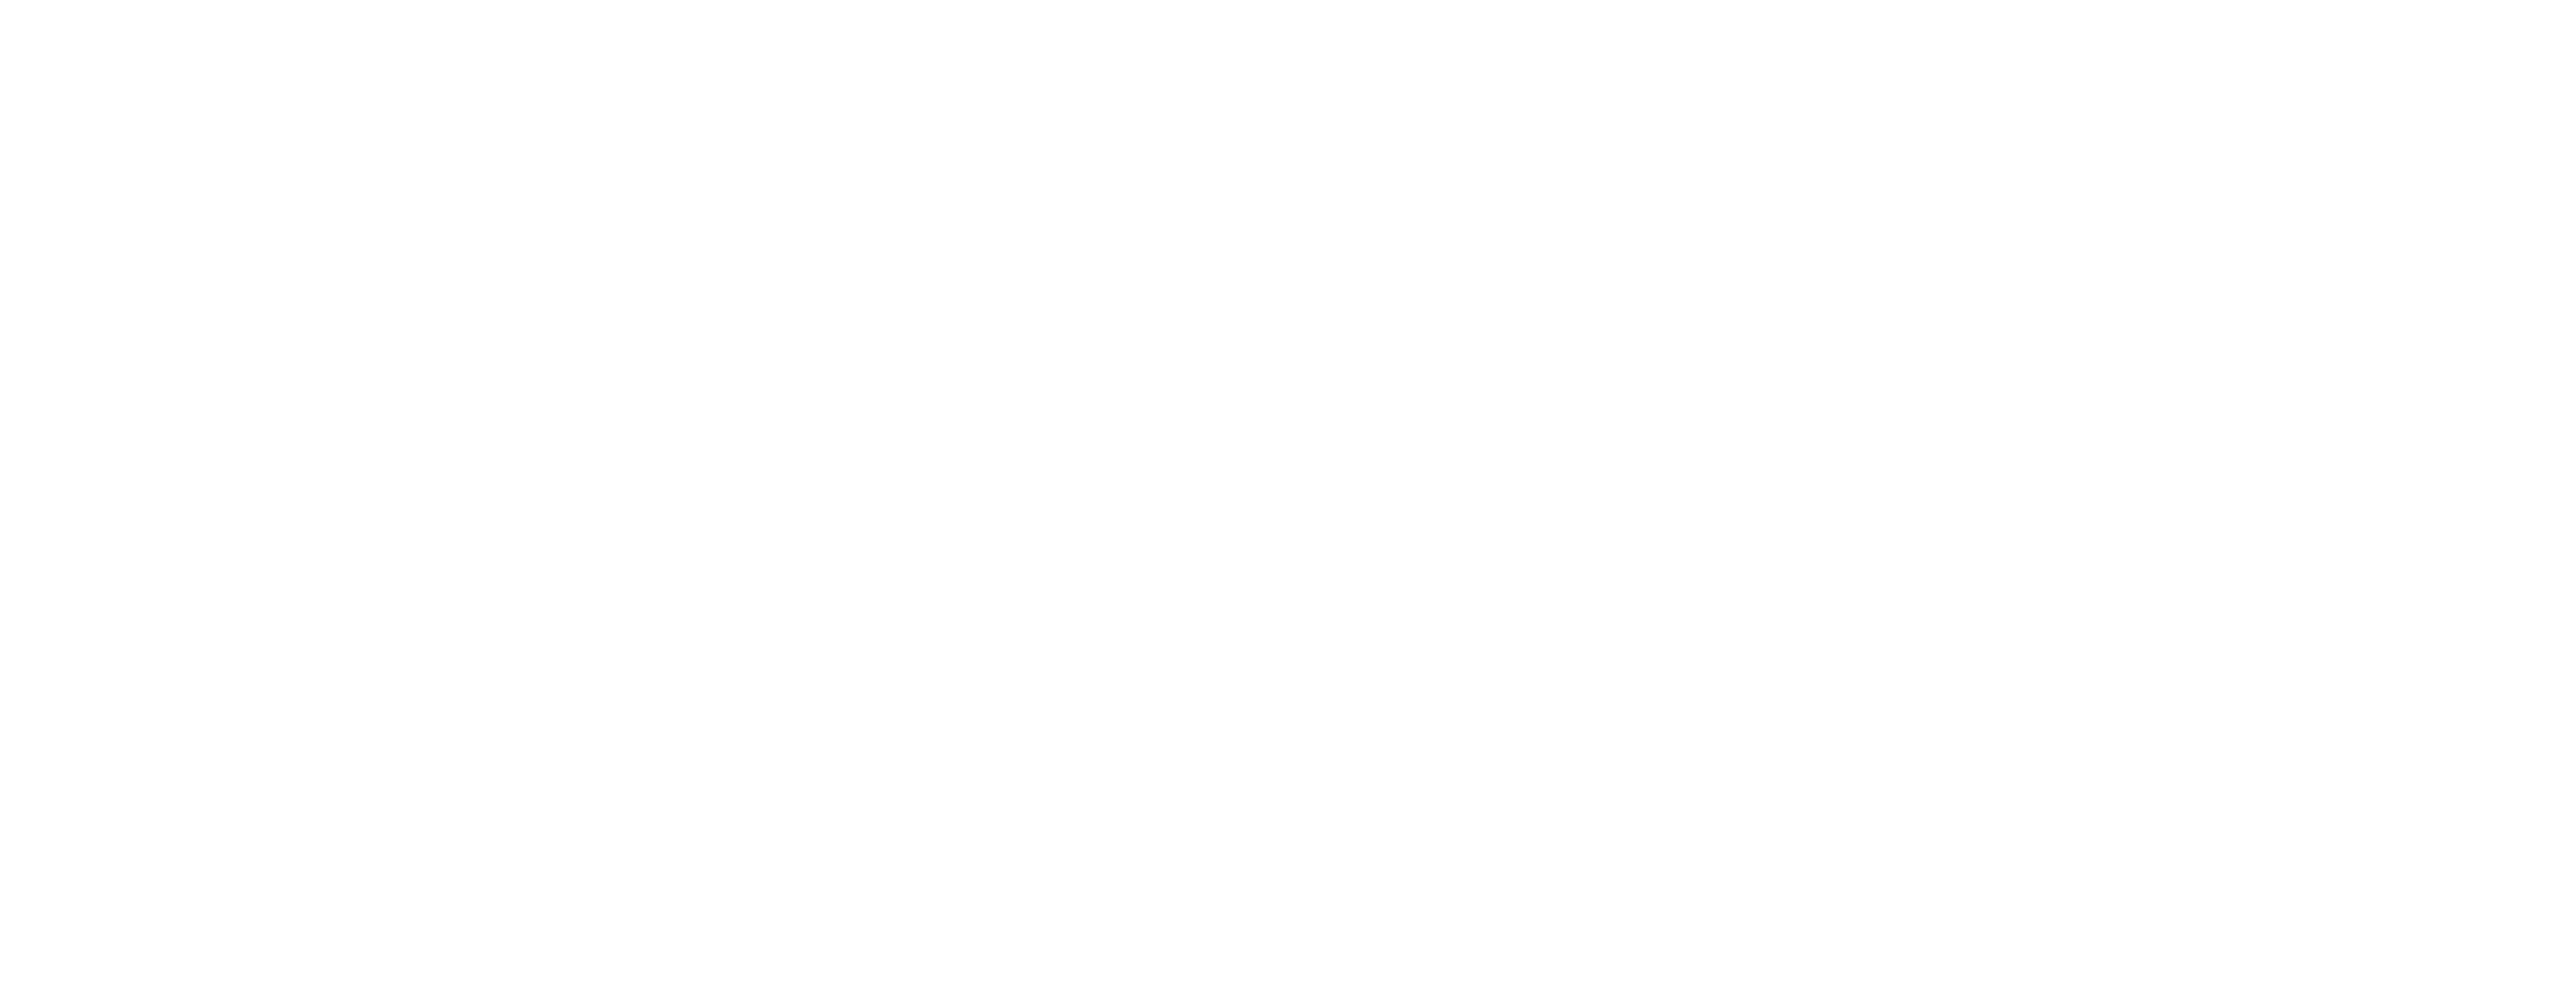

In [31]:
# Plot the Tree

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(125,50))

tree = plot_tree(tree_clf, 
              #feature_names=train_inputs.columns.values, # our feature names are stripped from the data set
              class_names=np.unique(train_y), 
              filled=True, 
              rounded=True, 
              fontsize=14)

# Decision Tree Model 2: Regularization

In [ ]:
tree_clf2 = DecisionTreeClassifier(min_samples_leaf = 10, max_depth=5)

tree_clf2.fit(train_x, train_y)

In [ ]:
#Train accuracy:
train_y_pred = tree_clf2.predict(train_x)

print(accuracy_score(train_y, train_y_pred))

In [ ]:
#Test accuracy:
test_y_pred = tree_clf2.predict(test_x)

print(accuracy_score(test_y, test_y_pred))

In [ ]:
#Test confusion matrix
confusion_matrix(test_y, test_y_pred)

# Randomized Grid Search

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_grid = {'max_depth': randint(low=5, high=20), 
              'min_samples_leaf': randint(low=5, high=20)}

tree_gs = RandomizedSearchCV(DecisionTreeClassifier(), param_grid, 
                             n_iter=15, cv=5, verbose=1,
                             scoring='accuracy',
                             return_train_score=True)

tree_gs.fit(train_x, train_y)

In [ ]:
cvres = tree_gs.cv_results_

for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(mean_score, params)

In [ ]:
#Find the best parameter set
tree_gs.best_params_

In [ ]:
tree_gs.best_estimator_

In [ ]:
#Train accuracy:
train_y_pred = tree_gs.best_estimator_.predict(train_x)

print(accuracy_score(train_y, train_y_pred))

In [ ]:
#Test accuracy:
test_y_pred = tree_gs.best_estimator_.predict(test_x)

print(accuracy_score(test_y, test_y_pred))

In [ ]:
#Test confusion matrix
confusion_matrix(test_y, test_y_pred)

# Discussion

Briefly answer the following questions: (2 points) 
1) Which model performs the best (and why)?<br>
2) What is the baseline?<br>
3) Does the best model perform better than the baseline (and why)?<br>
4) Does the best model exhibit any overfitting; what did you do about it?